In [1]:
file=r'/Users/lalitsachan/Dropbox/0.0 Data/insurance.csv'

In [2]:
import pandas as pd
import numpy as np
import datapipe_utils as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import graphviz

In [3]:
data=pd.read_csv(file)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
cat_dummies=['sex','smoker','region']
simple_numeric=['age','children','bmi']

In [7]:
dp=dt.DataPipe(cat_to_dummies=cat_dummies,
              simple_numeric=simple_numeric)

In [8]:
dp.fit(data)

In [9]:
x_train=dp.transform(data)

In [10]:
y_train=data['charges']

In [11]:
params={
        'max_depth':[None,5,6,7,8,10,15,20,30,50], # 10
        'min_samples_leaf':[1,2,5,10,15,20], # 6
        'min_samples_split':[2,5,10,15,20] # 5
        }

In [16]:
10*6*5

300

In [12]:
reg=DecisionTreeRegressor()

In [13]:
RandomizedSearchCV?

In [14]:
rs=RandomizedSearchCV(reg,
                     cv=10,
                     param_distributions=params,
                     scoring='neg_mean_absolute_error',
                     n_iter=50,
                     n_jobs=-1,
                     verbose=20)

In [15]:
rs.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 10, 15,
                                                      20, 30, 50],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [17]:
dt.report(rs.cv_results_,5)

Model with rank: 1
Mean validation score: -2594.142628 (std: 271.896902)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 5}

Model with rank: 2
Mean validation score: -2606.227370 (std: 289.517139)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 6}

Model with rank: 3
Mean validation score: -2614.684642 (std: 261.972647)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 6}

Model with rank: 4
Mean validation score: -2629.965380 (std: 289.870203)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 5}

Model with rank: 5
Mean validation score: -2631.974175 (std: 303.134515)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': 6}



In [19]:
display(graphviz.Source(export_graphviz(rs.best_estimator_,feature_names=x_train.columns,filled=True,rounded=True)).view()

'Source.gv.pdf'

[CV 7/10; 1/50] START max_depth=7, min_samples_leaf=5, min_samples_split=5......
[CV 7/10; 1/50] END max_depth=7, min_samples_leaf=5, min_samples_split=5;, score=-2433.305 total time=   0.0s
[CV 6/10; 3/50] START max_depth=8, min_samples_leaf=2, min_samples_split=2......
[CV 6/10; 3/50] END max_depth=8, min_samples_leaf=2, min_samples_split=2;, score=-2140.688 total time=   0.0s
[CV 6/10; 4/50] START max_depth=7, min_samples_leaf=10, min_samples_split=5.....
[CV 6/10; 4/50] END max_depth=7, min_samples_leaf=10, min_samples_split=5;, score=-1926.251 total time=   0.0s
[CV 3/10; 6/50] START max_depth=20, min_samples_leaf=1, min_samples_split=10....
[CV 3/10; 6/50] END max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=-3419.137 total time=   0.0s
[CV 4/10; 6/50] START max_depth=20, min_samples_leaf=1, min_samples_split=10....
[CV 4/10; 6/50] END max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=-2966.965 total time=   0.0s
[CV 7/10; 7/50] START max_depth=8, min_s

[CV 6/10; 1/50] START max_depth=7, min_samples_leaf=5, min_samples_split=5......
[CV 6/10; 1/50] END max_depth=7, min_samples_leaf=5, min_samples_split=5;, score=-2025.605 total time=   0.0s
[CV 5/10; 2/50] START max_depth=30, min_samples_leaf=20, min_samples_split=15...
[CV 5/10; 2/50] END max_depth=30, min_samples_leaf=20, min_samples_split=15;, score=-2753.229 total time=   0.0s
[CV 9/10; 2/50] START max_depth=30, min_samples_leaf=20, min_samples_split=15...
[CV 9/10; 2/50] END max_depth=30, min_samples_leaf=20, min_samples_split=15;, score=-2735.915 total time=   0.0s
[CV 2/10; 3/50] START max_depth=8, min_samples_leaf=2, min_samples_split=2......
[CV 2/10; 3/50] END max_depth=8, min_samples_leaf=2, min_samples_split=2;, score=-2823.025 total time=   0.0s
[CV 1/10; 4/50] START max_depth=7, min_samples_leaf=10, min_samples_split=5.....
[CV 1/10; 4/50] END max_depth=7, min_samples_leaf=10, min_samples_split=5;, score=-2447.678 total time=   0.0s
[CV 5/10; 4/50] START max_depth=7, min

[CV 1/10; 1/50] START max_depth=7, min_samples_leaf=5, min_samples_split=5......
[CV 1/10; 1/50] END max_depth=7, min_samples_leaf=5, min_samples_split=5;, score=-2429.787 total time=   0.0s
[CV 9/10; 1/50] START max_depth=7, min_samples_leaf=5, min_samples_split=5......
[CV 9/10; 1/50] END max_depth=7, min_samples_leaf=5, min_samples_split=5;, score=-2824.906 total time=   0.0s
[CV 1/10; 2/50] START max_depth=30, min_samples_leaf=20, min_samples_split=15...
[CV 1/10; 2/50] END max_depth=30, min_samples_leaf=20, min_samples_split=15;, score=-2482.690 total time=   0.0s
[CV 4/10; 2/50] START max_depth=30, min_samples_leaf=20, min_samples_split=15...
[CV 4/10; 2/50] END max_depth=30, min_samples_leaf=20, min_samples_split=15;, score=-3095.397 total time=   0.0s
[CV 7/10; 2/50] START max_depth=30, min_samples_leaf=20, min_samples_split=15...
[CV 7/10; 2/50] END max_depth=30, min_samples_leaf=20, min_samples_split=15;, score=-2567.281 total time=   0.0s
[CV 10/10; 2/50] START max_depth=30,

# Random Forest

In [20]:
x_train.shape

(1338, 8)

In [26]:
params_rf={
        'n_estimators':[50,100,150,200,250,300], # 6
        'max_features':[2,3,4,5,6,7,8],  # 7
        'bootstrap': [True,False], # 2
        'max_depth':[None,5,6,7,8,10,15,20,30,50], # 10
        'min_samples_leaf':[1,2,5,10,15,20], # 6
        'min_samples_split':[2,5,10,15,20] # 5
}

In [27]:
reg_rf=RandomForestRegressor()

In [28]:
rs_rf=RandomizedSearchCV(reg_rf,
                        cv=10,
                        param_distributions=params_rf,
                        scoring='neg_mean_absolute_error',
                        n_iter=50,
                        n_jobs=-1,
                        verbose=20)

In [29]:
rs_rf.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 6, 7, 8, 10, 15,
                                                      20, 30, 50],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [30]:
dt.report(rs_rf.cv_results_,5)

Model with rank: 1
Mean validation score: -2505.935424 (std: 239.252343)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 30, 'bootstrap': False}

Model with rank: 2
Mean validation score: -2508.119651 (std: 270.840448)
Parameters: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 6, 'max_depth': 10, 'bootstrap': False}

Model with rank: 3
Mean validation score: -2511.717276 (std: 230.061276)
Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': 8, 'bootstrap': True}

Model with rank: 4
Mean validation score: -2514.123764 (std: 270.223853)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 6, 'max_depth': 8, 'bootstrap': False}

Model with rank: 5
Mean validation score: -2516.009587 (std: 269.548866)
Parameters: {'n_estimators': 250, 'min_samples_split': 20, 'min_samples_leaf': 10,

In [31]:
reg_rf=RandomForestRegressor(**{'n_estimators': 300, 'min_samples_split': 20, 
                                'min_samples_leaf': 10, 'max_features': 6,
                                'max_depth': 10, 'bootstrap': False})

In [32]:
reg_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=6,
                      min_samples_leaf=10, min_samples_split=20,
                      n_estimators=300)

[CV 3/10; 1/50] START bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 3/10; 1/50] END bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-2713.284 total time=   0.4s
[CV 3/10; 2/50] START bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=20, min_samples_split=2, n_estimators=100
[CV 3/10; 2/50] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=20, min_samples_split=2, n_estimators=100;, score=-3040.208 total time=   0.1s
[CV 1/10; 3/50] START bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=10, min_samples_split=20, n_estimators=100
[CV 1/10; 3/50] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=10, min_samples_split=20, n_estimators=100;, score=-2855.999 total time=   0.1s
[CV 8/10; 3/50] START bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=10, min_samples_split=20, n_estimators=10

[CV 2/10; 1/50] START bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 2/10; 1/50] END bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-2437.166 total time=   0.4s
[CV 1/10; 2/50] START bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=20, min_samples_split=2, n_estimators=100
[CV 1/10; 2/50] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=20, min_samples_split=2, n_estimators=100;, score=-2706.116 total time=   0.1s
[CV 8/10; 2/50] START bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=20, min_samples_split=2, n_estimators=100
[CV 8/10; 2/50] END bootstrap=False, max_depth=None, max_features=4, min_samples_leaf=20, min_samples_split=2, n_estimators=100;, score=-3057.102 total time=   0.1s
[CV 5/10; 3/50] START bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=10, min_samples_split=20, n_estimators=

[CV 5/10; 1/50] START bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 5/10; 1/50] END bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-2509.518 total time=   0.4s
[CV 9/10; 1/50] START bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 9/10; 1/50] END bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-2489.494 total time=   0.4s
[CV 5/10; 4/50] START bootstrap=True, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=15, n_estimators=300
[CV 5/10; 4/50] END bootstrap=True, max_depth=8, max_features=3, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=-2987.909 total time=   0.3s
[CV 6/10; 5/50] START bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=15, min_samples_split=10, n_estimators=300
[CV 6/10; 5/50]

In [33]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':reg_rf.feature_importances_})

In [37]:
feat_imp_df

,features,importance
0,sex_male,0.001070
1,smoker_no,0.708131
2,region_southeast,0.001720
3,region_southwest,0.001558
4,region_northwest,0.000773
5,age,0.117251
6,children,0.009160
7,bmi,0.160338


In [40]:
feat_imp_df.sort_values(by='importance',ascending=False,inplace=True)

In [41]:
feat_imp_df

,features,importance
1,smoker_no,0.708131
7,bmi,0.160338
5,age,0.117251
6,children,0.009160
2,region_southeast,0.001720
3,region_southwest,0.001558
0,sex_male,0.001070
4,region_northwest,0.000773


In [42]:
feat_imp_df['cum_importance']=feat_imp_df['importance'].cumsum()

In [43]:
feat_imp_df

,features,importance,cum_importance
1,smoker_no,0.708131,0.708131
7,bmi,0.160338,0.868468
5,age,0.117251,0.985719
6,children,0.009160,0.994880
2,region_southeast,0.001720,0.996600
3,region_southwest,0.001558,0.998157
0,sex_male,0.001070,0.999227
4,region_northwest,0.000773,1.000000


# partial dependence plots 

In [44]:
%matplotlib inline

In [55]:
var_name='age'
preds=reg_rf.predict(x_train)

In [56]:
var_data=pd.DataFrame({var_name:x_train[var_name],'predictions':preds})

In [57]:
var_data

,age,predictions
0,19.0,17368.450282
1,18.0,3717.321358
2,28.0,5259.763414
3,33.0,7612.173232
4,32.0,4336.095854
...,...,...
1333,50.0,11156.278422
1334,18.0,4207.377777
1335,18.0,3336.917553
1336,21.0,2190.521279


In [58]:
import seaborn as sns

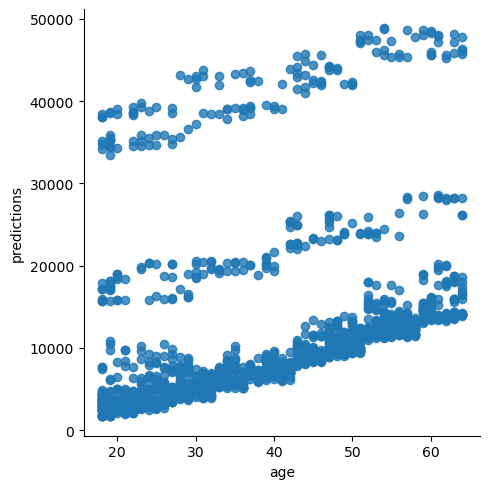

In [59]:
sns.lmplot(x=var_name,y='predictions',data=var_data,fit_reg=False)

In [60]:
import statsmodels.api as sm

In [61]:
smooth_data=sm.nonparametric.lowess(var_data['predictions'],var_data[var_name])
df=pd.DataFrame({'predictions':smooth_data[:,1],var_name:smooth_data[:,0]})

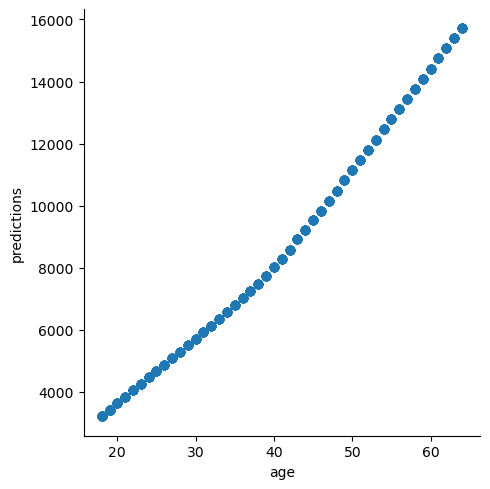

In [62]:
sns.lmplot(x=var_name,y='predictions',data=df,fit_reg=False)